In [87]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [88]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('data/train.csv')

In [90]:
df['Date'] = pd.to_datetime( df['Date']) # Convert date into datetime format
df['Num_Days'] = ( df['Date'] - df['Date'][0] ).dt.days # Add a coulmn for number of days from the first reported case.

In [91]:
#--- Some info about the data set.
df.info()
df.columns
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              19698 non-null  int64         
 1   Province_State  8375 non-null   object        
 2   Country_Region  19698 non-null  object        
 3   Date            19698 non-null  datetime64[ns]
 4   ConfirmedCases  19698 non-null  float64       
 5   Fatalities      19698 non-null  float64       
 6   Num_Days        19698 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.1+ MB


RangeIndex(start=0, stop=19698, step=1)

In [93]:
#--- Check how many NAN are there.
print( "NAN count in [Province_state, Country_region, Date, ConfirmedCases, Fatalities]", [sum( df[i].isna() ) for i in df.columns])

# Fill not-known data 
df = df.fillna( 'NoInfo')

NAN count in [Province_state, Country_region, Date, ConfirmedCases, Fatalities] [0, 11323, 0, 0, 0, 0, 0]


In [94]:
df['Province_State'].unique()
# df['Country_Region'].unique()

array(['NoInfo', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Aruba', 'Curacao', 'Sint Maarten', 'A

In [164]:
# To get the country names and province names 
def search_country_province( country, province, df):
    # Search country
    out = []
    for CName in df['Country_Region'].unique():
        if re.search(country, CName):
            out.append(CName)
    print('Countries: ', out)
    # Search province
    out = []
    for PName in df['Province_State'].unique():
        if re.search(province, PName):
               out.append(PName)
    print('Province: ', out)

search_country_province( 'U', 'North', df)

Countries:  ['US', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan']
Province:  ['Northern Territory', 'North Carolina', 'North Dakota']


In [165]:
def df_summed_provinces( df, CName ):
    '''
    * Sum over provices for a given country.
    * Note, output df has multilevel indexes.
    '''
    out = df.groupby( [ 'Country_Region','Num_Days']).sum()
    
    # Make hierarchical labels
    # df_r = df.groupby( ['Country_Region', 'Province_State'] )
    #df_r = df.set_index( ['Country_Region', 'Province_State'] )
    
    return out.loc[(CName,)]

# Extract US data summed over all provices/states
df_r = df_summed_provinces(df, 'United Kingdom')
df_r

,Id,ConfirmedCases,Fatalities
Num_Days,,,
0,198807,0.0,0.0
1,198814,0.0,0.0
2,198821,0.0,0.0
3,198828,0.0,0.0
4,198835,0.0,0.0
...,...,...,...
62,199241,8164.0,423.0
63,199248,9640.0,466.0
64,199255,11812.0,580.0


In [110]:
def df_country_province( df, CName, PName ):
    '''
    * Data for a given country and provice.
    * Note, output df has multilevel indexes.
    '''
    out = df.set_index( ['Country_Region', 'Province_State'] )
    out.head()
     
    return out.loc[(CName,PName)]
    
# Extract US data summed over all provices/states
df_r = df_country_province(df, 'US', 'Alabama')
df_r

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


Id       Date  ConfirmedCases  Fatalities  \
Country_Region Province_State                                                 
US             Alabama         22401 2020-01-22             0.0         0.0   
               Alabama         22402 2020-01-23             0.0         0.0   
               Alabama         22403 2020-01-24             0.0         0.0   
               Alabama         22404 2020-01-25             0.0         0.0   
               Alabama         22405 2020-01-26             0.0         0.0   
...                              ...        ...             ...         ...   
               Alabama         22463 2020-03-24           242.0         0.0   
               Alabama         22464 2020-03-25           381.0         1.0   
               Alabama         22465 2020-03-26           517.0         1.0   
               Alabama         22466 2020-03-27           587.0         4.0   
               Alabama         22467 2020-03-28           694.0         4.0   

                               Num_Days  
Country_Region Province_State            
US             Alabama                0  
               Alabama                1  
               Alabama                2  
               Alabama                3  
               Alabama                4  
...                                 ...  
               Alabama               62  
               Alabama               63  
               Alabama               64  
               Alabama               65  
               Alabama               66  

[67 rows x 5 columns]

# Plots

## Compare two provinces

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


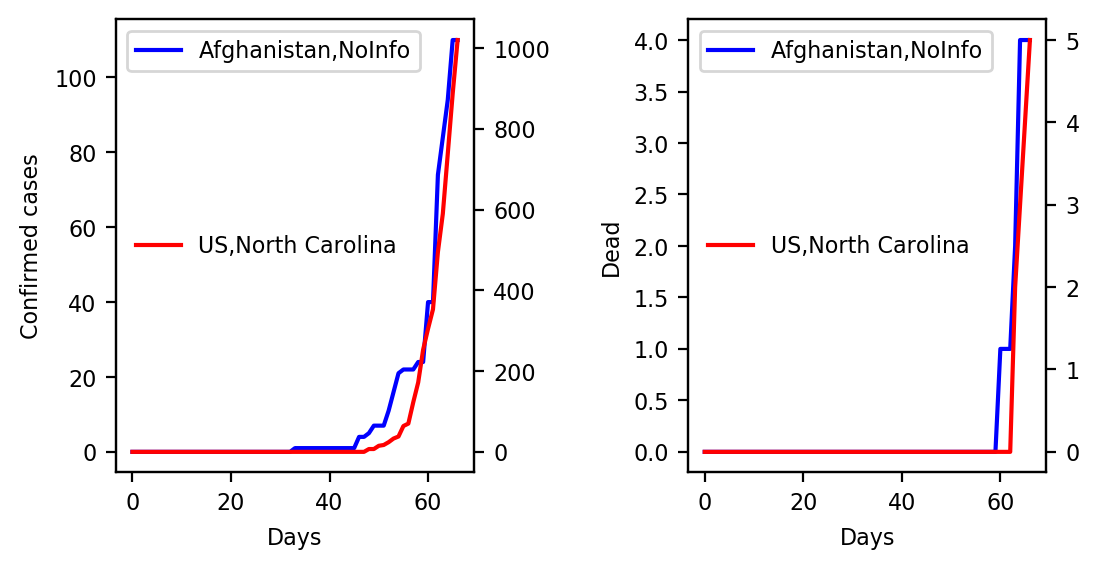

In [163]:
CName = 'Afghanistan'
PName = 'NoInfo'
# PName = 'North Carolina'

df_p = df_country_province(df, CName, PName)

fig, ax = plt.subplots(1,2, figsize = (6,3), dpi=200)
# fig, ax = plt.subplots(1,2, dpi=200)
fig.subplots_adjust(wspace=0.6, hspace=0.0)
ax = ax.ravel()
fontl=8

ax[0].plot( df_p['Num_Days'], df_p['ConfirmedCases'],'-',color='b', label=CName+','+PName)
ax[1].plot( df_p['Num_Days'], df_p['Fatalities'],'-',color='b', label=CName+','+PName)

# Second country, y2 axis
CName = 'US'
PName = 'North Carolina'
df_p = df_country_province(df, CName, PName)

axY2 = [ax[0].twinx(), ax[1].twinx()]
axY2[0].plot( df_p['Num_Days'], df_p['ConfirmedCases'],'-',color='r', label=CName+','+PName)
axY2[1].plot( df_p['Num_Days'], df_p['Fatalities'],'-',color='r', label=CName+','+PName)

for iPlot in [0,1]:
    ax[iPlot].set_xlabel('Days', fontsize=fontl)
#     ax[0].set_title( 'Cases', fontsize=fontl)
#     ax[1].set_title( 'Dead', fontsize=fontl)
    
    ax[0].set_ylabel('Confirmed cases', fontsize=fontl)
    ax[1].set_ylabel('Dead', fontsize=fontl)
    
    ax[iPlot].legend( loc='upper left', frameon = 0, fontsize=fontl)
    ax[iPlot].tick_params(axis='both', which='major', labelsize=1.0*fontl)
    
    axY2[iPlot].legend( loc='center left', frameon = 0, fontsize=fontl)
    axY2[iPlot].tick_params(axis='both', which='major', labelsize=1.0*fontl)
    
    ax[iPlot].legend( loc='upper left', frameon = 'True', fontsize=fontl)

In [158]:
search_country_province( 'U', 'No', df)

Countries:  ['US', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan']
Province:  ['NoInfo', 'Northern Territory', 'Nova Scotia', 'North Carolina', 'North Dakota']


## Compare two countries

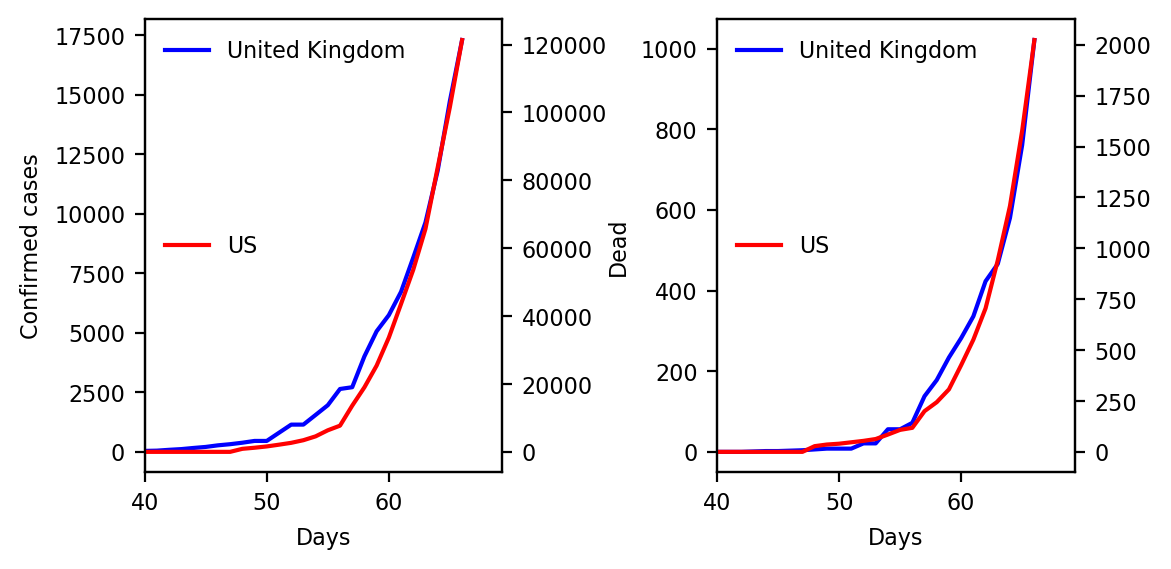

In [159]:
CName = 'United Kingdom'

df_p = df_summed_provinces(df, CName)

fig, ax = plt.subplots(1,2, figsize = (6,3), dpi=200)
# fig, ax = plt.subplots(1,2, dpi=200)
fig.subplots_adjust(wspace=0.6, hspace=0.0)
ax = ax.ravel()
fontl=8

ax[0].plot( df_p.index, df_p['ConfirmedCases'],'-',color='b', label=CName)
ax[1].plot( df_p.index, df_p['Fatalities'],'-',color='b', label=CName)

# Second country, y2 axis
CName = 'US'
df_p = df_summed_provinces(df, CName)

axY2 = [ax[0].twinx(), ax[1].twinx()]
axY2[0].plot( df_p.index, df_p['ConfirmedCases'],'-',color='r', label=CName)
axY2[1].plot( df_p.index, df_p['Fatalities'],'-',color='r', label=CName)

for iPlot in [0,1]:
    ax[iPlot].set_xlabel('Days', fontsize=fontl)
#     ax[0].set_title( 'Cases', fontsize=fontl)
#     ax[1].set_title( 'Dead', fontsize=fontl)
    
    ax[0].set_ylabel('Confirmed cases', fontsize=fontl)
    ax[1].set_ylabel('Dead', fontsize=fontl)
    
    ax[iPlot].legend( loc='upper left', frameon = 0, fontsize=fontl)
    ax[iPlot].tick_params(axis='both', which='major', labelsize=1.0*fontl)
    
    axY2[iPlot].legend( loc='center left', frameon = 0, fontsize=fontl)
    axY2[iPlot].tick_params(axis='both', which='major', labelsize=1.0*fontl)
    
    ax[iPlot].set_xlim(40,)

In [162]:
df[ df['Country_Region'] == 'US' ]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Num_Days
15008,22401,Alabama,US,2020-01-22,0.0,0.0,0
15009,22402,Alabama,US,2020-01-23,0.0,0.0,1
15010,22403,Alabama,US,2020-01-24,0.0,0.0,2
15011,22404,Alabama,US,2020-01-25,0.0,0.0,3
15012,22405,Alabama,US,2020-01-26,0.0,0.0,4
...,...,...,...,...,...,...,...
18621,27763,Wyoming,US,2020-03-24,29.0,0.0,62
18622,27764,Wyoming,US,2020-03-25,44.0,0.0,63
18623,27765,Wyoming,US,2020-03-26,53.0,0.0,64
18624,27766,Wyoming,US,2020-03-27,70.0,0.0,65
